# Explorative Korpusanalyse des Datensatzes Wissenschaftler

## Vorbereitung

Daten einlesen

In [99]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

In [100]:
nlp = spacy.load('de_core_news_sm')

In [101]:
tweets_wissenschaft = pd.read_excel("./data/tweets_wissenschaftler.xlsx")
accounts_wissenschaft = pd.read_excel('./data/accounts_wissenschaftler.xlsx')

In [102]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

def update_astype_bios(df):
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [103]:
update_astype_tweets(tweets_wissenschaft)
update_astype_bios(accounts_wissenschaft)

Laden der Spacy Docs

In [104]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [105]:
def load_spacy_docs_bios(df, name):
    spacy_doc = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        filename_bio = "bio_" + str(index).replace(" ", "") + ".txt"
        spacy_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/{filename_bio}"))
    df[f"spacy_doc_bios"] = spacy_doc

In [106]:
load_spacy_docs_tweets(tweets_wissenschaft, 'tweets_wissenschaftler')
load_spacy_docs_bios(accounts_wissenschaft, 'bios_wissenschaftler')

  0%|          | 0/796 [00:00<?, ?it/s]

In [107]:
tweets_wissenschaft.head()

tweet_date_create tweet_creator_atName    tweet_creator_screenName  \
0 2022-12-14 20:27:18               olewin  @olewin@mastodon.social 🇪🇺   
1 2022-12-14 21:01:37                t3pad         Sonnen-τau (he/him)   
2 2022-12-14 21:20:53            uehackler          U.E. Hackler🇩🇪🇯🇵🇺🇸   
3 2022-12-14 21:28:53            agriachim               Achim Spiller   
4 2022-12-14 21:45:39      kommunikationsm       Rüdiger Frankenberger   

                                   tweet_creator_bio  \
0  Earthling of European origin. #Nachhaltigkeit ...   
1  Wer nur auf mein Gendern eingeht, hat offensic...   
2  Ph.D. in Chemistry, Languages: German, English...   
3  Professor Lebensmittel- u. Agrarmarketing Uni ...   
4  Marketier I Lehrbeauftragter/Dozent I Berater ...   

                                          tweet_text  \
0  Die Politikerin @starkwatzinger schätzt, dass ...   
1                                                      
2                                                      
3  Beide waren tolle Partner im Bioweiderindproje...   
4  @christophploss @iterorg Welche Partei hat noc...   

                        retweet_text_retweeted_tweet  \
0                                                      
1  Kernfusion ist keine Lösung in der Klimakrise ...   
2  Der sensationelle Erfolg der USA bei der #Kern...   
3                                                      
4                                                      

                                          zitat_text    gender institution  \
0  Auch Deutschland habe Stärken in der Kernfusio...  männlich      Person   
1                                                     männlich      Person   
2                                                     männlich      Person   
3  Die Erzeugergemeinschaft Schwarzwald Bio-#Weid...  männlich      Person   
4                                                     männlich      Person   

      author_category                                   spacy_doc_tweets  \
0    wissenschaftsnah  (Die, Politikerin, @starkwatzinger, schätzt, ,...   
1    wissenschaftsnah                                                 ()   
2  Wissenschaftler*in                                                 ()   
3  Wissenschaftler*in  (Beide, waren, tolle, Partner, im, Bioweiderin...   
4    wissenschaftsnah  (@christophploss, @iterorg, Welche, Partei, ha...   

                                  spacy_doc_retweets  \
0                                                 ()   
1  (Kernfusion, ist, keine, Lösung, in, der, Klim...   
2  (Der, sensationelle, Erfolg, der, USA, bei, de...   
3                                                 ()   
4                                                 ()   

                              spacy_doc_zitat_tweets  
0  (Auch, Deutschland, habe, Stärken, in, der, Ke...  
1                                                 ()  
2                                                 ()  
3  (Die, Erzeugergemeinschaft, Schwarzwald, Bio-#...  
4                                                 ()

In [108]:
accounts_wissenschaft.head()

tweet_creator_atName tweet_creator_screenName  \
0       MoritzQueisner          Moritz Queisner   
1          student8204                   mateus   
2          gunnar_beck          Dr. Gunnar Beck   
3           TamboMarco          Marco Tamborini   
4      LennardSchmidt1          Lennard Schmidt   

                                   tweet_creator_bio    gender institution  \
0  Professor @ChariteBerlin. Digital health, tech...  männlich      Person   
1                                                     männlich      Person   
2  Europaabgeordneter der @AfD 🇩🇪 Stellvertretend...  männlich      Person   
3  historian and philosopher of science and techn...  männlich      Person   
4  Doktorand Universität Trier - Antisemitismus i...  männlich      Person   

                  author_category  \
0              Wissenschaftler*in   
1                wissenschaftsnah   
2  Wissenschaftsnahe Politiker*in   
3              Wissenschaftler*in   
4              Wissenschaftler*in   

                                      spacy_doc_bios  
0  (Professor, @ChariteBerlin, ., Digital, health...  
1                                                 ()  
2  (Europaabgeordneter, der, @AfD, 🇩, 🇪, Stellver...  
3  (historian, and, philosopher, of, science, and...  
4  (Doktorand, Universität, Trier, -, Antisemitis...

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [109]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [110]:
count_tweet_type(tweets_wissenschaft)

Anzahl Tweets: 878 (49.86% der Gesamtanzahl)
Anzahl Retweets: 883 (50.14% der Gesamtanzahl)
Anzahl zitierte Tweets: 364 (20.67% der Gesamtanzahl)


### Verteilung der Accounts

In [111]:
accounts_wissenschaft.shape

(796, 7)

In [112]:
accounts_wissenschaft['institution'].value_counts()

institution
Person    796
Name: count, dtype: int64

In [113]:
category_counts = accounts_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Accounts nach Kategorie:")
print(category_percentages)

Anzahl der Accounts nach Kategorie:
author_category
Wissenschaftler*in                     524
wissenschaftsnah                       264
Wissenschaftsnahe Politiker*in           7
Wissenschaftler*in und Politiker*in      1
Name: count, dtype: int64

Prozentsatz der Accounts nach Kategorie:
author_category
Wissenschaftler*in                     65.829146
wissenschaftsnah                       33.165829
Wissenschaftsnahe Politiker*in          0.879397
Wissenschaftler*in und Politiker*in     0.125628
Name: count, dtype: float64


In [114]:
accounts_wissenschaft[accounts_wissenschaft['institution'] == 'Person']['gender'].value_counts()

gender
männlich    796
Name: count, dtype: int64

### Verteilung der Tweets

In [115]:
tweets_wissenschaft.shape

(1761, 13)

In [116]:
tweets_wissenschaft['institution'].value_counts()

institution
Person    1761
Name: count, dtype: int64

In [117]:
category_counts = tweets_wissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Tweets nach Kategorie:")
print(category_percentages)

Anzahl der Tweets nach Kategorie:
author_category
Wissenschaftler*in                     1121
wissenschaftsnah                        617
Wissenschaftsnahe Politiker*in           19
Wissenschaftler*in und Politiker*in       4
Name: count, dtype: int64

Prozentsatz der Tweets nach Kategorie:
author_category
Wissenschaftler*in                     63.657013
wissenschaftsnah                       35.036911
Wissenschaftsnahe Politiker*in          1.078932
Wissenschaftler*in und Politiker*in     0.227144
Name: count, dtype: float64


In [118]:
tweets_wissenschaft[tweets_wissenschaft['institution'] == 'Person']['gender'].value_counts()

gender
männlich    1761
Name: count, dtype: int64

### Token + Sentences

In [119]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result


In [120]:
counts = get_token_sent_counts(tweets_wissenschaft)

  0%|          | 0/1761 [00:00<?, ?it/s]

  0%|          | 0/1761 [00:00<?, ?it/s]

  0%|          | 0/1761 [00:00<?, ?it/s]

In [121]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens   25036     26045            11100
1  Sentences    2839      3031             1201

In [122]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [123]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', tweets_wissenschaft) ,
        'Retweets': stats(counts, 'retweets', tweets_wissenschaft) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', tweets_wissenschaft) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  28.514806  29.496036        30.494505
1  Mean Sentences per Tweet   3.233485   3.432616         3.299451
2       Tokens per Sentence   8.818598   8.592874         9.242298

#### Type-Token Verhältnis

Lemmas extrahieren

In [124]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [125]:
lemmas_tweets = get_lemmas(tweets_wissenschaft)

  0%|          | 0/1761 [00:00<?, ?it/s]

  0%|          | 0/1761 [00:00<?, ?it/s]

  0%|          | 0/1761 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [126]:
from lexical_diversity import lex_div as ld

In [127]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category    Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.268768  0.215276          0.26597

#### Token per Bio

In [128]:
def calculate_token_stats(docs):
    num_tokens = [len(doc) for doc in docs]

    min_tokens = min(num_tokens)
    max_tokens = max(num_tokens)
    avg_tokens = sum(num_tokens) / len(num_tokens)

    return min_tokens, max_tokens, avg_tokens

min_tokens, max_tokens, avg_tokens = calculate_token_stats(accounts_wissenschaft['spacy_doc_bios'])

print("Minimal tokens in bio:", min_tokens)
print("Maximal tokens in bio:", max_tokens)
print("Durchschnittliche tokens in bio:", avg_tokens)

Minimal tokens in bio: 0
Maximal tokens in bio: 45
Durchschnittliche tokens in bio: 19.265075376884422


## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [129]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [130]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [131]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [132]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [133]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

In [134]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [135]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [136]:
common_words_tweets = common_words1(tweets_wissenschaft, 'tweets')
common_words_retweets = common_words1(tweets_wissenschaft, 'retweets')
common_words_zitat_tweets = common_words1(tweets_wissenschaft, 'zitat_tweets')
common_words_all = common_words_all1(tweets_wissenschaft)

In [137]:
common_words_tweets

word  freq
0          forschung   667
1                mal    44
2              lehre    44
3                  2    39
4           brauchen    38
5       wissenschaft    37
6                       37
7             studie    36
8              thema    35
9              sehen    34
10       deutschland    33
11            zeigen    29
12           aktuell    27
13             frage    27
14  @karl_lauterbach    27
15       entwicklung    26
16           einfach    26
17              klar    24
18            finden    23
19           wichtig    23
20             genau    23
21               neu    23
22                 3    23
23           problem    22
24            mensch    22
25          ergebnis    22
26       interessant    22
27                 1    22
28        eigentlich    21
29                 👇    21
30              geld    20
31             gerne    20
32          sprechen    19
33              welt    19
34            wissen    19
35  wissenschaftlich    19
36           bildung    18
37                 ️    18
38         empirisch    18
39            können    18
40           bleiben    18
41        innovation    17
42             mecfs    17
43         schreiben    17
44             geben    17
45       @tagesschau    17
46            arbeit    17
47            helfen    16
48             leben    16
49            sicher    16

In [138]:
common_words_retweets

word  freq
0      forschung   622
1   wissenschaft    92
2              ️    76
3         berlin    69
4          thema    61
5         mensch    53
6          lehre    51
7              ⬇    49
8        aktuell    48
9    deutschland    48
10            --    46
11      spannend    43
12       bildung    40
13             2    40
14       wichtig    36
15         innen    36
16   technologie    34
17         mecfs    34
18      brauchen    33
19             1    33
20           100    33
21           mal    32
22    @fu_berlin    32
23        freuen    31
24        zeigen    30
25        studie    30
26       digital    30
27        pfizer    30
28          2023    29
29             i    29
30           neu    28
31       projekt    28
32      forschen    28
33    erforschen    28
34          echt    27
35      forscher    26
36             👉    26
37    geschichte    26
38  beschäftigen    26
39        online    26
40     longcovid    26
41         infos    25
42         prof.    25
43        finden    25
44        sofort    25
45   ichbinhanna    25
46             6    25
47        führen    25
48         unser    24
49        wissen    24

In [139]:
common_words_zitat_tweets

word  freq
0          forschung   208
1                  ️    47
2      demonstrieren    44
3                  ➡    38
4               2023    37
5              lehre    37
6                 1.    36
7           brauchen    34
8          gemeinsam    33
9            aufgabe    31
10                --    30
11             april    30
12            widmen    30
13       information    30
14            lothar    29
15                h.    29
16            wieler    29
17         verlässen    29
18               amt    29
19       niederlegen    29
20             china    28
21         professor    28
22               rki    28
23  pressemitteilung    28
24         @bmg_bund    28
25       dankewieler    28
26             falls    25
27              euer    24
28          dringend    24
29               uni    23
30             klima    23
31     international    22
32             liebe    22
33     klimaschützer    22
34          ansinnen    22
35              ehre    22
36          fleissig    22
37         engagiert    22
38             demos    22
39      wissenschaft    19
40            mensch    17
41        innovation    16
42            studie    16
43        gesundheit    16
44           bildung    16
45               the    15
46  wissenschaftlich    15
47              welt    14
48               neu    13
49            finden    13

In [140]:
common_words_all

word  freq
0      forschung  1497
1   wissenschaft   148
2              ️   141
3          lehre   132
4          thema   106
..           ...   ...
95          2022    34
96      institut    34
97      dringend    34
98         stark    34
99           for    34

[100 rows x 2 columns]

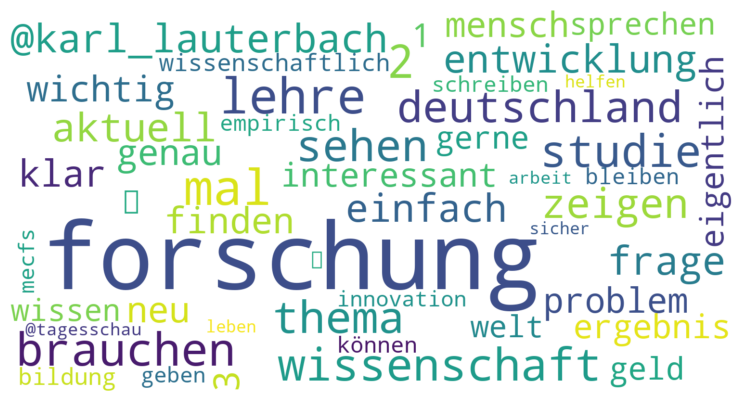

In [141]:
create_wordcloud(common_words_tweets)

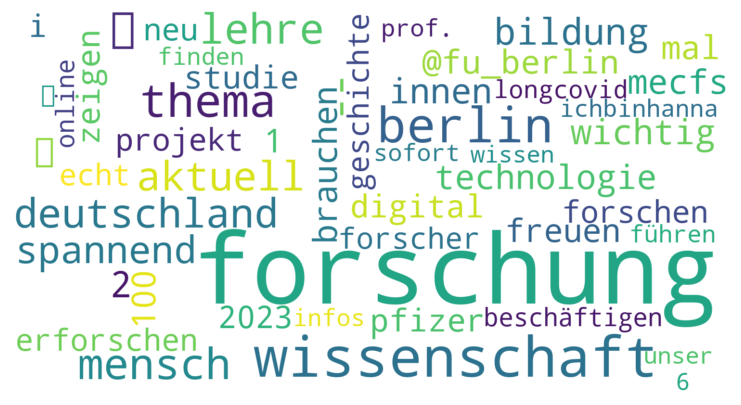

In [142]:
create_wordcloud(common_words_retweets)

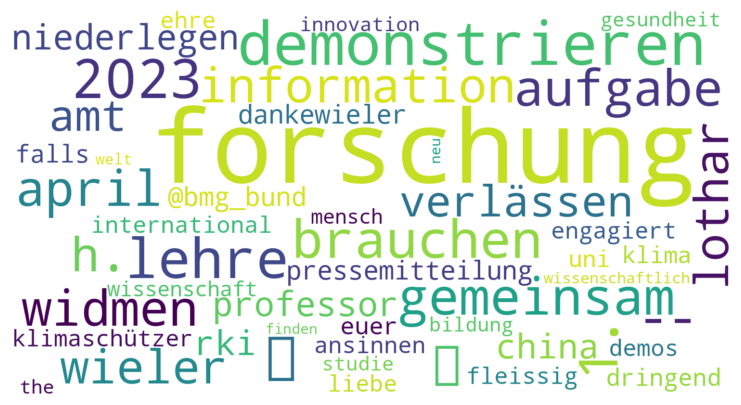

In [143]:
create_wordcloud(common_words_zitat_tweets)

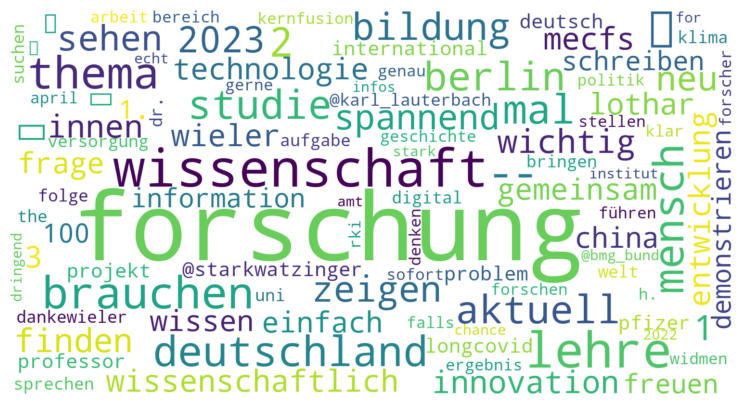

In [144]:
create_wordcloud(common_words_all)

#### Die häufigsten Wörter 2 - ohne Stoppwörter und Hashtags

In [145]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [147]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [148]:
common_words_tweets2 = common_words2(tweets_wissenschaft['tweet_text'])
common_words_retweets2 = common_words2(tweets_wissenschaft['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(tweets_wissenschaft['zitat_text'])
common_words_all2 = common_words_all2(tweets_wissenschaft)

In [149]:
common_words_tweets2.head(50)

word  freq
0        forschung   637
1              die    94
2              das    86
3              ich    78
4              sie    67
5               es    65
6              und    60
7              mal    44
8            lehre    39
9               in    38
10            aber    35
11             wir    35
12             wie    34
13    wissenschaft    33
14          jahren    32
15             was    32
16            wenn    30
17     deutschland    29
18           thema    29
19     entwicklung    24
20             der    24
21             ein    24
22         einfach    24
23              du    24
24         braucht    22
25            klar    22
26           frage    21
27            geld    20
28           gerne    20
29            welt    20
30           zeigt    20
31            zeit    20
32        menschen    20
33         studien    19
34      eigentlich    19
35           jahre    18
36           danke    18
37         problem    18
38           genau    18
39             mit    18
40              ja    17
41      tagesschau    17
42           innen    17
43      ergebnisse    16
44            auch    16
45  starkwatzinger    15
46          studie    15
47          arbeit    15
48         könnten    15
49          sicher    14

In [150]:
common_words_retweets2.head(50)

word  freq
0       forschung   525
1             die   169
2             wir    87
3             das    76
4    wissenschaft    71
5           innen    62
6             sie    61
7          jahren    59
8        menschen    49
9             der    48
10          lehre    48
11            ein    45
12             es    45
13         berlin    42
14            ich    40
15             im    39
16             in    36
17          thema    36
18           auch    35
19           mehr    33
20            mal    32
21    deutschland    32
22         freuen    30
23            mit    30
24              i    29
25      aktuellen    29
26      erforscht    28
27       forscher    27
28            wer    26
29         online    26
30        bildung    25
31          infos    25
32            the    25
33         themen    25
34         sofort    25
35    technologie    24
36            für    24
37           hier    24
38       forschen    24
39     exzellente    24
40  vergangenheit    24
41           seit    24
42          zeigt    23
43         spuren    23
44     spannenden    23
45       pflanzen    23
46          führt    23
47            for    22
48           jahr    22
49     versorgung    22

In [151]:
common_words_zitat_tweets2.head(50)

word  freq
0          forschung   187
1                wir    39
2                die    37
3              lehre    36
4               alle    34
5                das    31
6              april    30
7                 er    30
8      informationen    30
9             lothar    29
10            wieler    29
11          verlässt    29
12               amt    29
13       niederlegen    29
14          aufgaben    29
15            widmen    29
16         professor    28
17               rki    28
18       gemeinsamen    28
19  pressemitteilung    28
20             china    27
21               ihr    27
22             falls    25
23              also    24
24          dringend    24
25               sie    23
26                of    23
27               uni    23
28             liebe    23
29             klima    23
30                da    23
31               the    22
32     klimaschützer    22
33              euer    22
34          ansinnen    22
35             ehren    22
36     demonstrieren    22
37          fleissig    22
38         engagiert    22
39      demonstriert    22
40             demos    22
41         gebraucht    22
42    internationale    18
43               der    17
44               was    17
45               ich    16
46        gesundheit    16
47                im    15
48                es    15
49               mit    15

In [152]:
common_words_all2.head(50)

word  freq
0        forschung  1349
1              die   300
2              das   193
3              wir   161
4              sie   151
5              ich   134
6               es   125
7            lehre   123
8     wissenschaft   116
9           jahren   101
10           innen    92
11             der    89
12             und    88
13             mal    84
14              in    84
15        menschen    82
16             ein    80
17           thema    73
18     deutschland    70
19             was    68
20              im    65
21             mit    63
22             wie    61
23            auch    59
24            alle    58
25             the    55
26             wer    52
27          berlin    52
28          lothar    52
29            aber    50
30           zeigt    50
31          wieler    50
32         bildung    49
33            also    49
34            hier    49
35         einfach    48
36            mehr    48
37           china    47
38            wenn    47
39              er    47
40   informationen    47
41              of    47
42  starkwatzinger    46
43            welt    46
44            jahr    45
45     entwicklung    45
46          freuen    44
47           jahre    43
48         studien    43
49         braucht    42

In [153]:
common_words_all2.to_excel("common_words_wissenschaftler.xlsx")

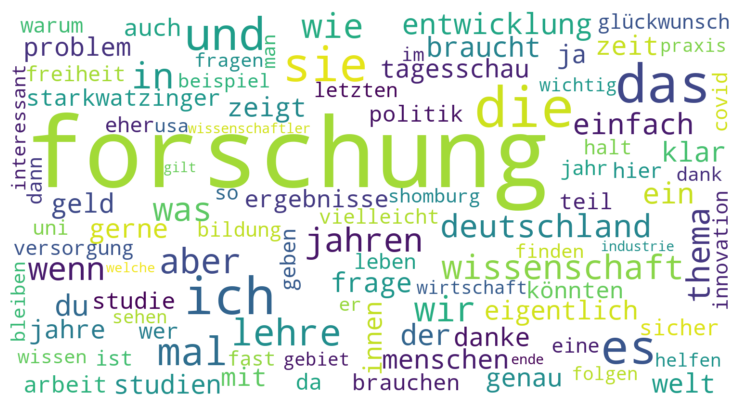

In [154]:
create_wordcloud(common_words_tweets2)

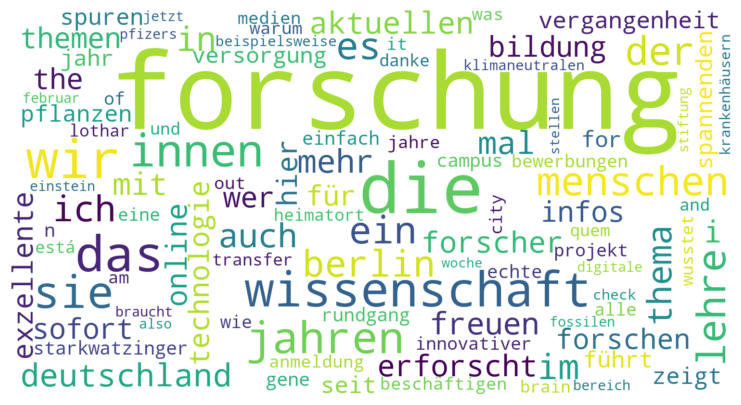

In [155]:
create_wordcloud(common_words_retweets2)

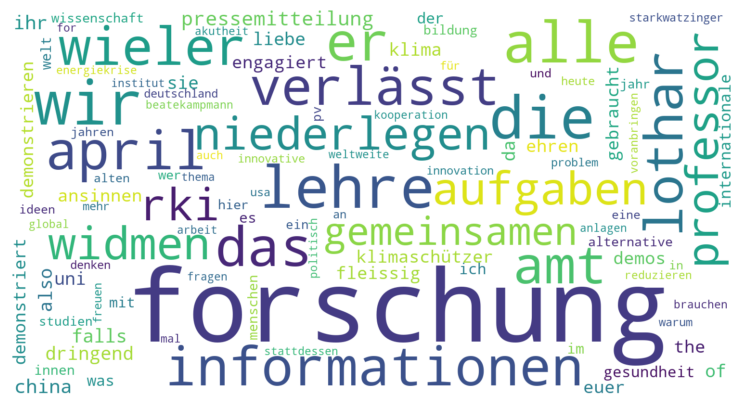

In [156]:
create_wordcloud(common_words_zitat_tweets2)

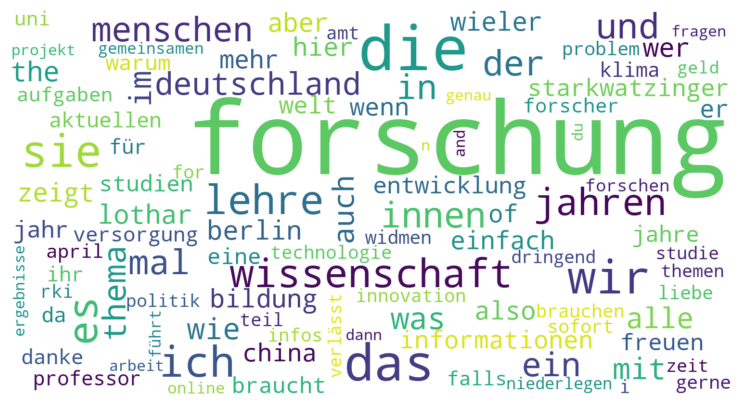

In [157]:
create_wordcloud(common_words_all2)

#### Häufigste Adjektive

In [158]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [159]:
def common_adjectives_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    adj_freq = Counter()
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
            adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [160]:
adjectives_tweets = common_adjectives(tweets_wissenschaft, 'tweets')
adjectives_retweets = common_adjectives(tweets_wissenschaft, 'retweets')
adjectives_zitat_tweets = common_adjectives(tweets_wissenschaft, 'zitat_tweets')
adjectives_all = common_adjectives_all(tweets_wissenschaft)

In [161]:
adjectives_all.head(50)

word  freq
0                neuen    84
1                 neue    83
2            aktuellen    40
3                 gute    38
4          gemeinsamen    31
5                liebe    28
6               eigene    26
7       internationale    26
8                echte    26
9              letzten    24
10          spannenden    24
11   wissenschaftliche    23
12             weitere    22
13             eigenen    20
14           deutschen    20
15            digitale    19
16              andere    19
17               alten    18
18           spannende    18
19      klimaneutralen    18
20  wissenschaftlichen    17
21          innovative    16
22            deutsche    16
23               neuer    16
24             pariser    15
25               tolle    14
26          herzlichen    14
27          empirische    14
28               neues    14
29          exzellente    14
30              ersten    13
31            aktuelle    13
32           digitalen    13
33        medizinische    13
34            nächsten    13
35            wichtige    13
36               erste    13
37              großen    12
38           klinische    12
39                este    12
40             anderen    11
41               guter    11
42               große    11
43           wichtigen    11
44  wissenschaftlicher    11
45         öffentliche    11
46               junge    11
47        akademischen    10
48             bessere    10
49               guten    10

In [162]:
adjectives_tweets.head(50)

word  freq
0                  gute    20
1                  neue    17
2                eigene    16
3                andere    16
4                 neuen    12
5               letzten    12
6               anderen     9
7               eigenen     9
8             aktuellen     9
9              aktuelle     8
10           herzlichen     8
11                neuer     8
12          empirischer     8
13                tolle     7
14           empirische     7
15             deutsche     7
16                große     7
17                guten     7
18   wissenschaftlichen     7
19                ganze     6
20               großen     6
21         interessante     6
22              weitere     6
23            deutschen     6
24             wichtige     6
25               ersten     5
26          akademische     5
27           spannendes     5
28         akademischen     5
29    wissenschaftliche     5
30              bessere     5
31         medizinische     5
32   wissenschaftlicher     5
33                liebe     4
34                grüne     4
35         nachhaltigen     4
36      psychologischen     4
37               ganzen     4
38                alten     4
39               höhere     4
40         öffentlichen     4
41        medizinischer     4
42           raubeinige     4
43    differenzierteres     4
44  germanischesprachen     4
45            klinische     4
46            spannende     4
47              eigener     4
48           motivierte     4
49         systemischer     4

In [163]:
adjectives_retweets

word  freq
0             neue    49
1            neuen    33
2        aktuellen    29
3       spannenden    23
4            echte    21
..             ...   ...
95          freier     3
96  langanhaltende     3
97  herausragenden     3
98       zwponline     3
99       regionale     3

[100 rows x 2 columns]

In [164]:
adjectives_zitat_tweets

word  freq
0            neuen    39
1      gemeinsamen    28
2            liebe    22
3   internationale    18
4             neue    17
..             ...   ...
95       eintreten     1
96      furchtbare     1
97      sofortiges     1
98          nötige     1
99       zentralen     1

[100 rows x 2 columns]

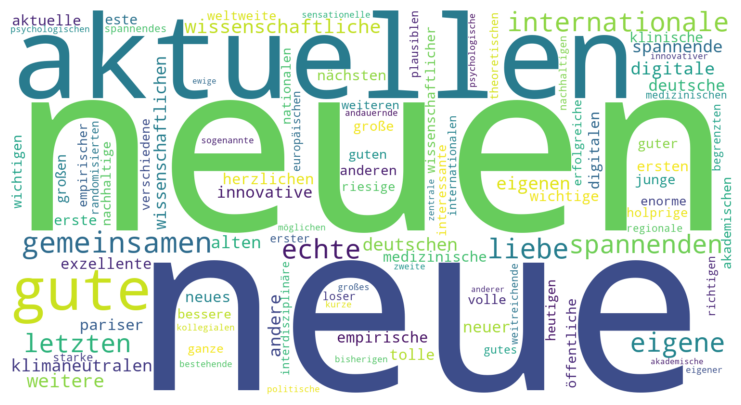

In [165]:
create_wordcloud(adjectives_all)

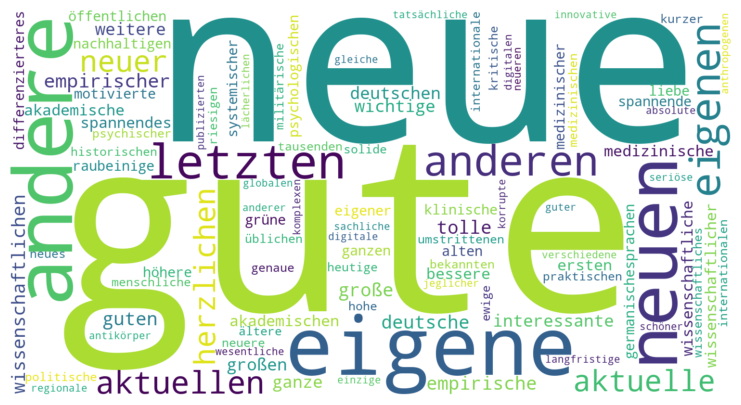

In [166]:
create_wordcloud(adjectives_tweets)

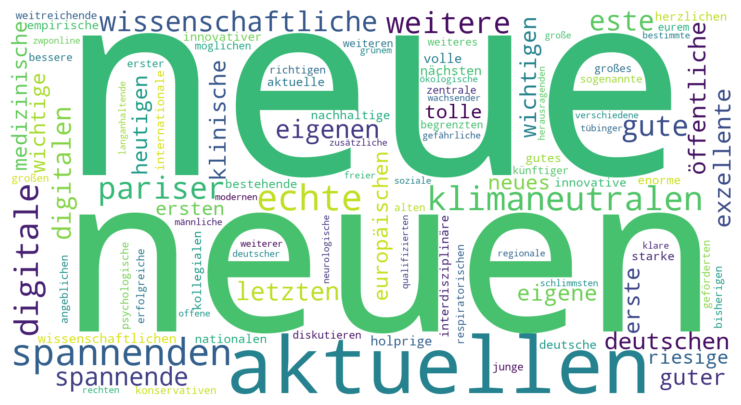

In [167]:
create_wordcloud(adjectives_retweets)

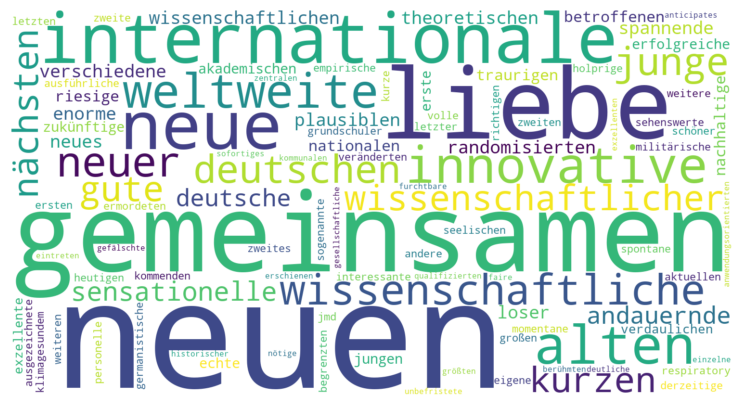

In [168]:
create_wordcloud(adjectives_zitat_tweets)

#### Die häufigsten Nomen 

In [169]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [170]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [171]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [172]:
def common_nouns_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    nouns = []
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(100)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [173]:
common_nouns_tweets = common_nouns(tweets_wissenschaft, 'tweets')
common_nouns_retweets = common_nouns(tweets_wissenschaft, 'retweets')
common_nouns_zitat_tweets = common_nouns(tweets_wissenschaft, 'zitat_tweets')
common_nouns_all = common_nouns_all(tweets_wissenschaft)

In [174]:
common_nouns_all

word  freq
0      forschung  1489
1   wissenschaft   146
2          lehre   131
3          thema   106
4         mensch    92
..           ...   ...
95        schule    18
96         grund    18
97   klimawandel    18
98         tweet    18
99        spitze    18

[100 rows x 2 columns]

In [175]:
common_nouns_tweets

word  freq
0         forschung   663
1             lehre    43
2      wissenschaft    37
3             thema    35
4            studie    34
5       entwicklung    26
6             frage    26
7           problem    22
8            mensch    22
9          ergebnis    22
10             geld    20
11             welt    19
12          bildung    18
13       innovation    17
14           arbeit    17
15    ufo-forschung    16
16         freiheit    14
17          politik    14
18      alternative    14
19          projekt    13
20             kind    13
21            folge    13
22           gebiet    13
23              uni    13
24          beitrag    13
25            leben    12
26  @starkwatzinger    12
27       wirtschaft    12
28            danke    12
29          experte    12
30             herr    12
31      glückwunsch    12
32      technologie    12
33        jahrzehnt    12
34       versorgung    12
35              dr.    11
36           schule    11
37              weg    11
38      möglichkeit    10
39          bereich    10
40         institut    10
41        interesse    10
42             land    10
43             ding    10
44           praxis    10
45             frau    10
46        industrie    10
47            grund    10
48        erfahrung    10
49  wissenschaftler    10

In [176]:
common_nouns_retweets

word  freq
0          forschung   618
1       wissenschaft    91
2              thema    61
3             mensch    53
4              lehre    51
5            bildung    40
6        technologie    34
7            projekt    28
8             studie    27
9           forscher    26
10        geschichte    26
11             prof.    25
12     vergangenheit    24
13              spur    23
14        versorgung    23
15           pflanze    23
16            pfizer    23
17        innovation    22
18            campus    22
19        @fu_berlin    22
20               gen    22
21          rundgang    22
22           bereich    21
23         anmeldung    20
24               dr.    20
25                 🇪    19
26            medium    19
27          transfer    19
28         bewerbung    18
29             seite    18
30       betroffener    18
31         heimatort    18
32             brain    18
33     krankenhäuser    18
34           zukunft    17
35       entwicklung    17
36          einstein    17
37          stiftung    17
38           februar    17
39         jahrzehnt    17
40        kernfusion    16
41             infos    16
42             woche    16
43             folge    16
44           politik    16
45             danke    16
46   @starkwatzinger    16
47            chance    16
48       information    16
49  mecfsimbundestag    16

In [177]:
common_nouns_zitat_tweets

word  freq
0             forschung   208
1                 lehre    37
2               aufgabe    31
3                 april    30
4           information    30
5                   amt    29
6             professor    28
7      pressemitteilung    28
8                     ➡    28
9           dankewieler    28
10                  uni    23
11                klima    23
12        klimaschützer    22
13             ansinnen    22
14                 ehre    22
15         wissenschaft    18
16               mensch    17
17               studie    16
18           gesundheit    16
19              bildung    16
20                 welt    14
21           innovation    12
22                 idee    12
23          alternative    12
24                frage    11
25           kernfusion    10
26                thema    10
27                folge    10
28              problem    10
29             institut    10
30               chance    10
31          kooperation     9
32               stelle     8
33                  dr.     8
34               fossil     8
35      @starkwatzinger     8
36         globalhealth     8
37          entwicklung     8
38             akutheit     8
39         energiekrise     8
40               anlage     8
41               arbeit     8
42                blick     7
43                 ding     7
44              antwort     7
45                 land     7
46        verschrottung     7
47  gen4-akw(-forschung     7
48             atommüll     7
49           ministerin     7

##### Wordclouds

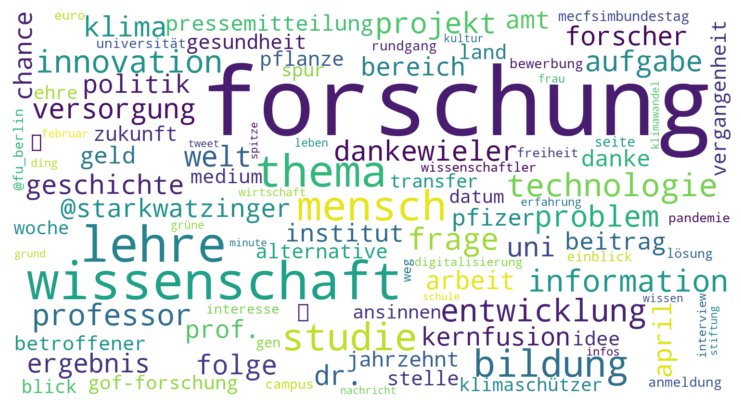

In [178]:
create_wordcloud(common_nouns_all)

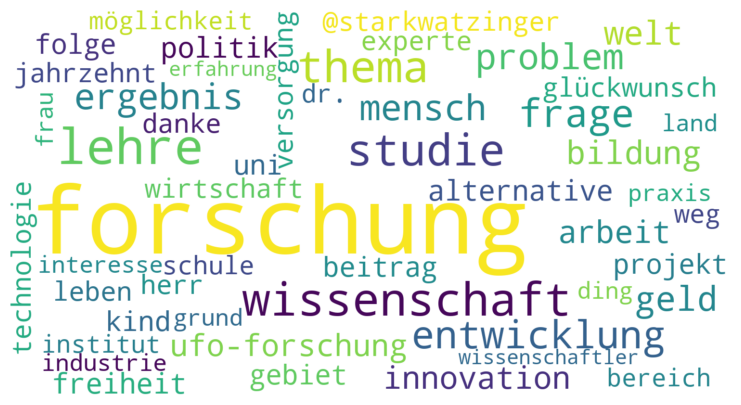

In [179]:
create_wordcloud(common_nouns_tweets)

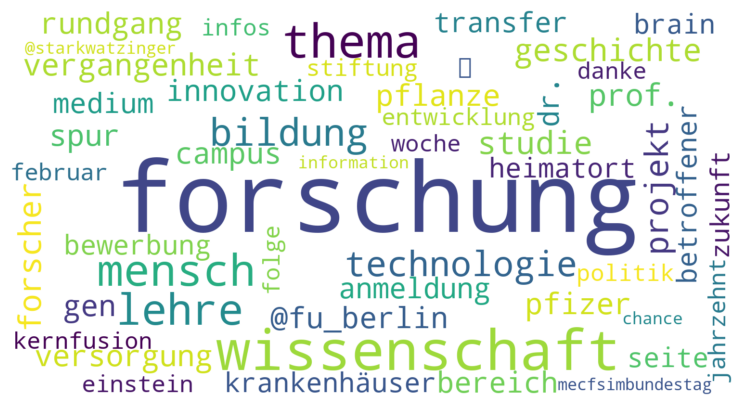

In [180]:
create_wordcloud(common_nouns_retweets)

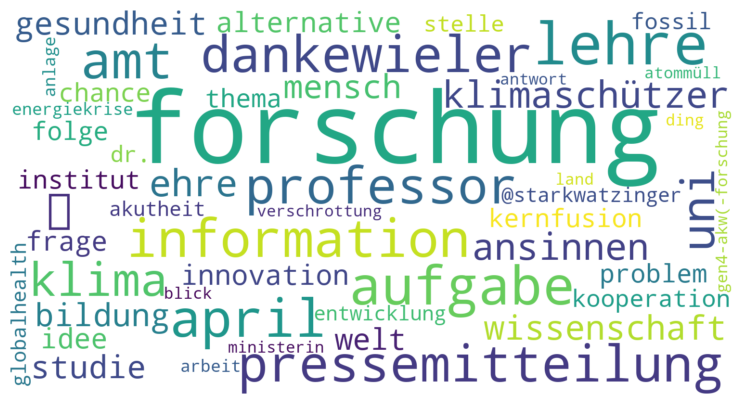

In [181]:
create_wordcloud(common_nouns_zitat_tweets)

### Bios

In [182]:
def common_words_lemmas(lemmas_df):
    word_freq = Counter(lemmas_df)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [183]:
def get_lemmas_bios(df):
    lemmas = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for token in row[f"spacy_doc_bios"]:
            if not token.is_punct and \
            not token.is_space and \
            not token.is_bracket and \
            not token.is_digit and \
            not token.is_quote and \
            not token.like_url and \
            not token.like_email:
                lemmas.append(token.lemma_)
    return lemmas

In [184]:
lemmas_bios = get_lemmas_bios(accounts_wissenschaft)
common_words_bios = common_words_lemmas(lemmas_bios)

  0%|          | 0/796 [00:00<?, ?it/s]

In [185]:
common_words_bios

word  freq
0           |   524
1         und   350
2          in   182
3         and   174
4          of   132
..        ...   ...
95     policy    12
96       Head    12
97  Migration    12
98      Autor    11
99     Editor    11

[100 rows x 2 columns]

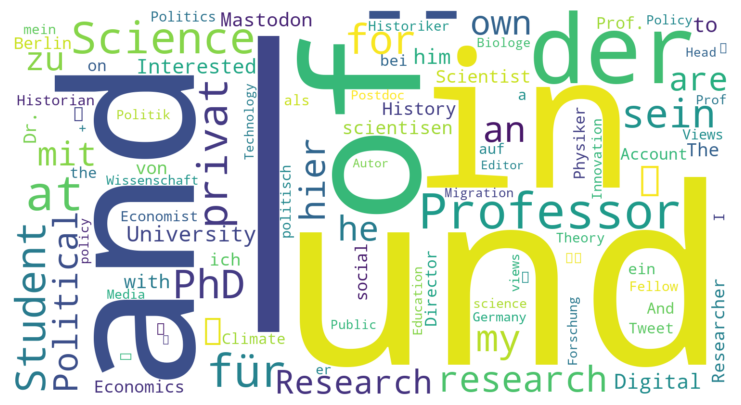

In [186]:
create_wordcloud(common_words_bios)

In [187]:
common_nouns_bios = common_nouns(accounts_wissenschaft, 'bios')
common_nouns_bios

word  freq
0              professor    74
1                      🇪    51
2                student    50
3                    dr.    23
4                  prof.    19
5               physiker    18
6                account    15
7             historiker    14
8           wissenschaft    13
9              forschung    13
10               politik    12
11               biologe    11
12                 autor    11
13              director    11
14                 tweet    11
15              lecturer    11
16            innovation    11
17              mitglied    10
18                editor    10
19                  arzt    10
20               medizin    10
21                     🇮     9
22       wissenschaftler     9
23                senior     8
24                   uni     8
25                    he     8
26                social     8
27             migration     8
28           mitarbeiter     8
29            vorsitzend     7
30           universität     7
31       digitalisierung     7
32            geschichte     7
33            management     7
34             education     7
35                author     7
36                dozent     7
37                 vater     7
38               meinung     7
39             doktorand     6
40     intensivmediziner     6
41              mastodon     6
42                former     6
43                  papa     6
44            journalist     6
45             biologist     6
46            researcher     6
47        sozialdemokrat     6
48                father     6
49  naturwissenschaftler     6

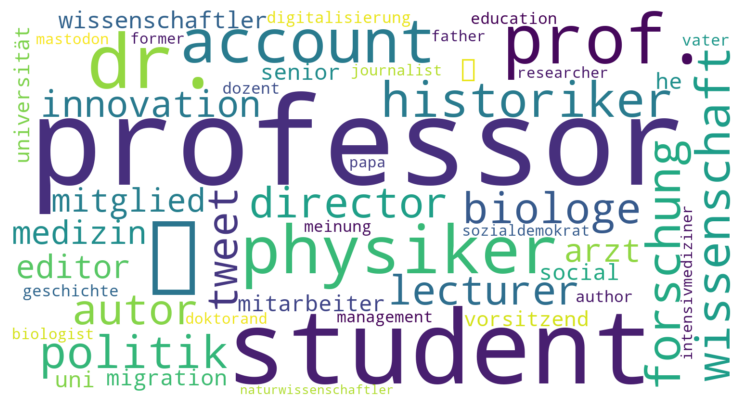

In [188]:
create_wordcloud(common_nouns_bios)

Zusatzanalyse: Vorkommen von "he" und "him"

In [189]:
he_count = 0
him_count = 0
for doc in accounts_wissenschaft["spacy_doc_bios"]:
    # Zählen der Wörter im Dokument
    for token in doc:
        if token.text.lower() == 'he':
            he_count += 1
        elif token.text.lower() == 'him':
            him_count += 1
            
print(f"'He' count: {he_count}")
print(f"'Him' count: {him_count}")

'He' count: 44
'Him' count: 34


## Analyse der Hashtags

In [190]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [191]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#Forschung: 126
#MECFS: 58
#DankeWieler: 39
#Wissenschaft: 31
#LongCovid: 29
#Bildung: 24
#IchBinHanna: 23
#MECFSimBundestag: 20
#phdlife: 18
#WirBerlin: 18
#Zukunftsstrategie: 17
#GlobalHealth: 16
#Klimawandel: 15
#3K23: 14
#Kernfusion: 13
#CharitéBerlin: 13
#BerlinUniversityAlliance: 13
#AcademicChatter: 13
#Wissen: 11
#IchBinReyhan: 11
#IchbinHanna: 10
#Archäologie: 10
#Geschichte: 10
#Nachrichten: 10
#Kultur: 10
#Deutschland: 10
#WissKomm: 10
#Einsteinstelltein: 10
#Technologieoffenheit: 10
#Meldungen: 9


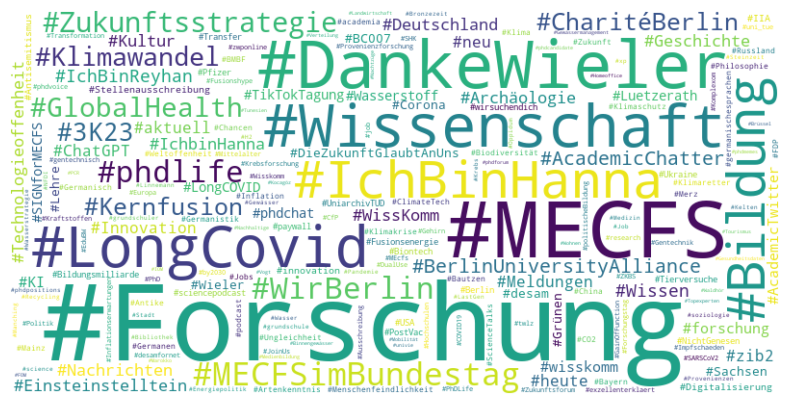

In [192]:
# Tweets Wissenschaft
count_hashtags_all(tweets_wissenschaft)

In [193]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [194]:
count_hashtags_seperate(tweets_wissenschaft)

Top hashtags in tweet_text:
#MECFS: 22
#Forschung: 20
#MECFSimBundestag: 6
#Bildung: 5
#Wissenschaft: 5
#SIGNforMECFS: 5
#Lehre: 4
#USA: 4
#3K23: 4
#Germanistik: 4
#Germanen: 4
#germanischesprachen: 4
#Germanisch: 4
#BC007: 4
#Kernfusion: 3
#Deutschland: 3
#WissKomm: 3
#Transfer: 3
#China: 3
#Chancen: 3

Top hashtags in retweet_text_retweeted_tweet:
#Forschung: 85
#MECFS: 31
#Wissenschaft: 20
#IchBinHanna: 20
#LongCovid: 18
#WirBerlin: 18
#Bildung: 15
#MECFSimBundestag: 14
#BerlinUniversityAlliance: 13
#Zukunftsstrategie: 12
#Wissen: 11
#IchBinReyhan: 11
#Archäologie: 10
#Geschichte: 10
#Nachrichten: 10
#Kultur: 10
#Einsteinstelltein: 10
#Meldungen: 9
#neu: 9
#aktuell: 9

Top hashtags in zitat_text:
#DankeWieler: 28
#Forschung: 21
#CharitéBerlin: 10
#phdlife: 9
#Klimawandel: 8
#AcademicChatter: 8
#LongCovid: 8
#GlobalHealth: 8
#Wissenschaft: 6
#3K23: 6
#Kernfusion: 5
#MECFS: 5
#Zukunftsstrategie: 5
#Grünen: 4
#AcademicTwitter: 4
#phdchat: 4
#Bildung: 4
#DieZukunftGlaubtAnUns: 4
#Klimar

## Zusatz

In [195]:
# Suche nach Tweets mit "innen"
common_words_all2.loc[common_words_all2['word'] == 'innen']

word  freq
10  innen    92

In [196]:
for index, row in tweets_wissenschaft.iterrows():
    # Überprüfen, ob 'innen' im 'tweet_text' vorhanden ist
    if pd.notna(row['tweet_text']) and 'innen' in row['tweet_text']:
        print('Tweet:', row['tweet_text'])
    
    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Retweet:', row['retweet_text_retweeted_tweet'])

    if pd.notna(row['retweet_text_retweeted_tweet']) and 'innen' in row['retweet_text_retweeted_tweet']:
        print('Zitierter Tweet:', row['zitat_text'])

Retweet: BMBF-geförderte Forscherinnen und Forscher der @TU_Muenchen und @ALICEexperiment zeigen, wie man Messungen am Large Hadron Collider #LHC verwenden kann, um im Weltall #DunkleMaterie zu suchen. 👉 #Astronomie #Forschung 
Zitierter Tweet: 
Retweet: Lust auf Lehre und Forschung zu Fragen von Demokratie und Digitalisierung? An meiner Professur ist eine Mitarbeiter*innen-Stelle zu besetzen: TV-L 13, 65%, zunächst für vier Jahre - @unierfurt. Alle Infos: - Freue mich über Bewerbungen bis zum 06.01! 
Zitierter Tweet: 
Retweet: In der „Marburger Erklärung“ @FotoMarburg werden u.a. Hochschulsammlungen, Hochschulleitungen, zuständige Ministerien und Drittmittelgeber*innen dazu aufgefordert, gemeinsam Strategien für eine nachhaltige Digitalisierung zu entwickeln. Alle Infos: 
Zitierter Tweet: 
Retweet: Lust auf Lehre und Forschung zu Fragen von Demokratie und Digitalisierung? An meiner Professur ist eine Mitarbeiter*innen-Stelle zu besetzen: TV-L 13, 65%, zunächst für vier Jahre - @unierf